<a href="https://colab.research.google.com/github/qhuy4119/1712858-1712495-nmkhdl/blob/main/KHDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional
from keras import optimizers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Môn học/Introduce Data Science/Đố án/price-history_28-12-2020.csv')

In [ ]:
df

,Date,Close,Open,Highest,Lowest
0,12/25/2020,46600,45500,46700,45000
1,12/24/2020,45500,45500,46800,43900
2,12/23/2020,46600,47000,47500,46400
3,12/22/2020,46850,47450,47450,46600
4,12/21/2020,47450,47900,48000,46500
...,...,...,...,...,...
1714,02/10/2014,17000,16500,17200,16200
1715,02/07/2014,16600,17400,17500,16500
1716,02/06/2014,17600,18200,18300,17600
1717,01/27/2014,18400,18700,18800,18100


In [ ]:
Date=np.array(df['Date'])
Close=np.array(df['Close'])
Open=np.array(df['Open'])
Highest=np.array(df['Highest'])
Lowest=np.array(df['Lowest'])

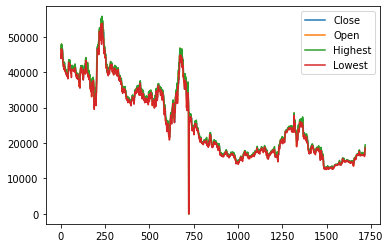

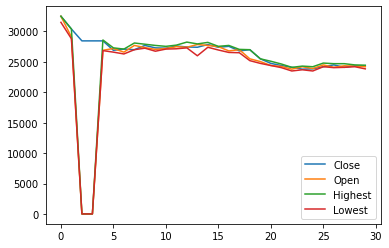

In [ ]:
#VISUALIZE
plt.plot(Close, label='Close')
plt.plot(Open,label='Open')
plt.plot(Highest,label='Highest')
plt.plot(Lowest,label='Lowest')
plt.legend()
plt.show()

plt.plot(Close[720:750], label='Close')
plt.plot(Open[720:750],label='Open')
plt.plot(Highest[720:750],label='Highest')
plt.plot(Lowest[720:750],label='Lowest')
plt.legend()
plt.show()

n_features=4
n_steps=30

In [ ]:
def create_LSTM(n_steps,n_features):
    model = Sequential()
    model.add(Bidirectional((LSTM(300, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))))
    model.add(Bidirectional((LSTM(300, activation='relu'))))

    model.add(Dense(300))
    model.add(Dense(n_features))
    initial_learning_rate = 0.1
    lr_schedule = optimizers.schedules.ExponentialDecay(
        initial_learning_rate,
        decay_steps=100000,
        decay_rate=0.96,
        staircase=True)

    model.compile(optimizer=optimizers.SGD(learning_rate=lr_schedule), loss='mse',metrics=['mean_squared_error'])
    print('Long Short-Term Memory networks Summary: ')
    #print(model.summary())
  
    return model;

In [ ]:
model = create_LSTM(n_steps,n_features)

Long Short-Term Memory networks Summary: 


In [ ]:
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        end_ix = i + n_steps
        if end_ix > len(sequences)-1:
            break
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [ ]:
print('Close Shape Before: ',Close.shape)
Close = Close.reshape((len(Close), 1))
Open = Open.reshape((len(Open), 1))
Highest = Highest.reshape((len(Highest), 1))
Lowest = Lowest.reshape((len(Lowest), 1))
dataset = np.hstack((Close,Open,Highest,Lowest))

print('Close Shape After: ',Close.shape)
print('Dataset Shape: ',dataset.shape)

Close Shape Before:  (1719,)
Close Shape After:  (1719, 1)
Dataset Shape:  (1719, 4)


In [ ]:
dataset_train,dataset_test=train_test_split(dataset,shuffle=False,test_size=0.2)

In [ ]:
scaler=MinMaxScaler(feature_range=(-1,1))
scaler.fit(dataset_train)

dataset_train=scaler.transform(dataset_train)
dataset_test=scaler.transform(dataset_test)

x_train, y_train = split_sequences(dataset_train, n_steps)
x_test,y_test=split_sequences(dataset_test,n_steps)

print('X Shape: ',x_train.shape)
print('Y Shape: ',y_train.shape)

X Shape:  (1345, 30, 4)
Y Shape:  (1345, 4)


In [ ]:
history=model.fit(x_train, y_train, epochs=60, verbose=1,validation_data=(x_test, y_test))

Epoch 1/60
43/43 [==============================] - 37s 752ms/step - loss: 0.1100 - mean_squared_error: 0.1100 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 2/60
43/43 [==============================] - 30s 703ms/step - loss: 0.0134 - mean_squared_error: 0.0134 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 3/60
43/43 [==============================] - 29s 668ms/step - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 4/60
43/43 [==============================] - 29s 674ms/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 5/60
43/43 [==============================] - 29s 676ms/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 6/60
43/43 [==============================] - 30s 689ms/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 7/60
43/43 [====

In [ ]:
def plot_history(history):
  acc = history.history['mean_squared_error']
  val_acc = history.history['val_mean_squared_error']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  x = range(1, len(loss) + 1)
  plt.figure(figsize=(20, 5))
  plt.subplot(1, 2, 1)
  plt.plot(x, acc, 'b', label='Training mean_squared_error')
  plt.plot(x, val_acc, 'r', label='val_mean_squared_error')
  plt.title('Training and validation mse')
  plt.legend()
  #plt.subplot(1, 2, 2)
  #plt.plot(x, loss, 'b', label='Training loss')
  #plt.plot(x, val_loss, 'r', label='Validation loss')
  #plt.title('Training and validation loss')
  #plt.legend()
  #plt.show()

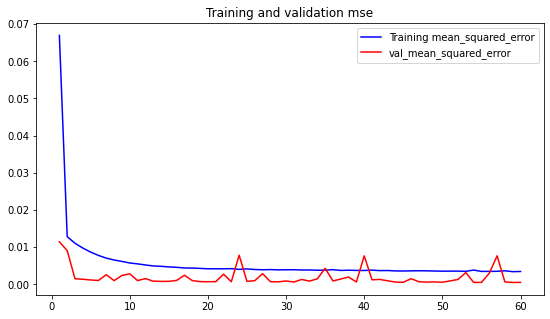

In [ ]:
plot_history(history)